In [1]:
%load_ext autoreload
%autoreload 2

import banner

topics = ['Introduction to Large Language Models: Word Embeddings',
          'Representing Words Numerically',
          'Word2Vec']
          

banner.reset(topics)



Topics in this Notebook

1. Introduction to Large Language Models: Word Embeddings
2. Representing Words Numerically
3. Word2Vec


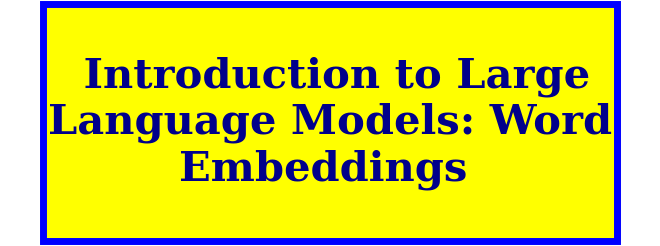

In [2]:
banner.next_topic()

# Introduction to Large Language Models : Word Embeddings


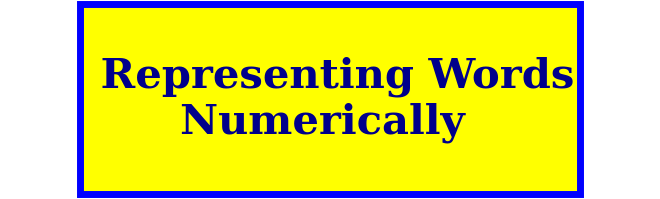

In [3]:
banner.next_topic()

## Representing Words Numerically

Representing a word as a numerical vector is usually called an embedding.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

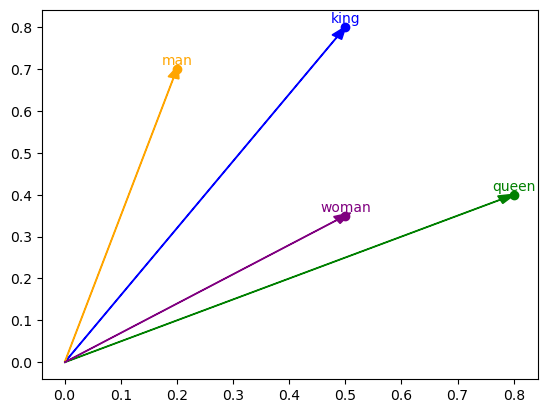

In [8]:
king = np.array([0.5, 0.8])
man = np.array([0.2, 0.7])
queen =  np.array([0.8, .4])
woman = np.array([0.5, 0.35])

def plot(xy, label, color):
    plt.plot(xy[0], xy[1], 'o', color=color)
    plt.arrow(0, 0, xy[0] * 0.97, xy[1] * 0.97, head_width=0.02, color=color)
    plt.annotate(label, xy + [0, 0.01], ha='center', color=color)

plot(king, 'king', 'blue')
plot(man, 'man', 'orange')
plot(queen, 'queen', 'green')
plot(woman, 'woman', 'purple')

The cosine of the angle between two vectors is often used as a measure of the similarity of two vectors.

Let $\theta$ be the angle between two vectors, $v_1$ and $v_2$.  If the two vectors are equal, the angle is zero and the cosine of the angle is 1.  If the two vectors are perpendicular, the angle is 90 degrees and the cosine is 0.  If one vector is the negative of the other, the angle is 180 degrees and the cosine is -1.

$$ \begin{eqnarray}
v_1 \cdot v_2 &= ||v_1|| ||v_2|| \cos(\theta)\\
\cos(\theta) &= \frac{v_1 \cdot v_2}{||v_1|| ||v_2||}
\end{eqnarray}$$

In [9]:
def similarity(a, b):
    return np.dot(a, b) / (np.sqrt(np.dot(a, a)) * np.sqrt(np.dot(b, b)))

vectors_labels = list(zip([king, queen, man, woman],
                          ['king', 'queen', 'man', 'woman']))
print(vectors_labels)

print(f'The similarity between')
for v, label in vectors_labels:
    for v2, label2 in vectors_labels:
        print(f'  {label} and {label2} is {similarity(v, v2)}')

[(array([0.5, 0.8]), 'king'), (array([0.8, 0.4]), 'queen'), (array([0.2, 0.7]), 'man'), (array([0.5 , 0.35]), 'woman')]
The similarity between
  king and king is 1.0
  king and queen is 0.8532818336519589
  king and man is 0.9609725834417836
  king and woman is 0.9204871449227451
  queen and king is 0.8532818336519589
  queen and queen is 1.0
  queen and man is 0.6757246285173464
  queen and woman is 0.9892034623538708
  man and king is 0.9609725834417836
  man and queen is 0.6757246285173464
  man and man is 1.0000000000000002
  man and woman is 0.7764580943901146
  woman and king is 0.9204871449227451
  woman and queen is 0.9892034623538708
  woman and man is 0.7764580943901146
  woman and woman is 1.0


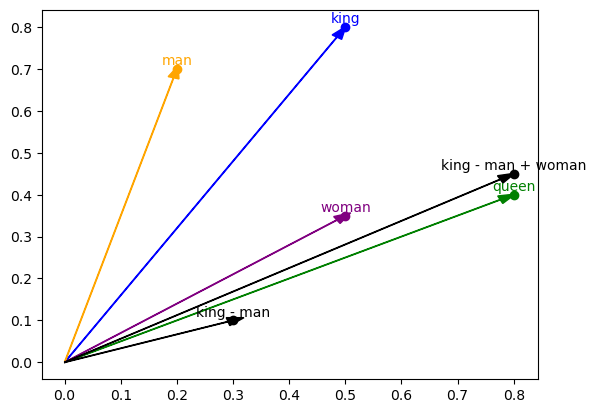

In [10]:
colors = ['blue', 'orange', 'green', 'purple']
plot(king, 'king', 'blue')
plot(man, 'man', 'orange')
plot(queen, 'queen', 'green')
plot(woman, 'woman', 'purple')

plot(king - man, 'king - man', 'black')
plot(king - man + woman, 'king - man + woman', 'black')

In [11]:
print(f'The similarity between man - king + woman and king is {similarity(king - man + woman, king)}')
print(f'The similarity between man - king + woman and queen is {similarity(king - man + woman, queen)}')


The similarity between man - king + woman and king is 0.8776748105365554
The similarity between man - king + woman and queen is 0.9988123511248966


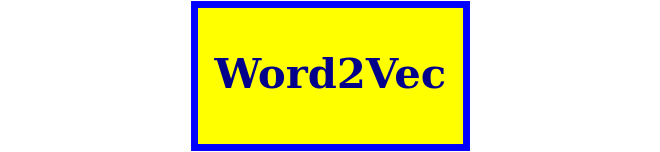

In [12]:
banner.next_topic()

## Word2Vec

The following code is adapted from [Word2Vec Model](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html)

In [17]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __iter__(self):
        corpus_path = datapath('lee_background.cor')
        for line in open(corpus_path):
            # assume there's one document per line, tokens separated by whitespace
            yield utils.simple_preprocess(line)

In [14]:
datapath('lee_background.cor')

'/Users/anderson/anaconda3/lib/python3.10/site-packages/gensim/test/test_data/lee_background.cor'

In [20]:
!head -2 /Users/anderson/anaconda3/lib/python3.10/site-packages/gensim/test/test_data/lee_background.cor

Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wales as strong winds today pushed a huge bushfire towards the town of Hill Top. A new blaze near Goulburn, south-west of Sydney, has forced the closure of the Hume Highway. At about 4:00pm AEDT, a marked deterioration in the weather as a storm cell moved east across the Blue Mountains forced authorities to make a decision to evacuate people from homes in outlying streets at Hill Top in the New South Wales southern highlands. An estimated 500 residents have left their homes for nearby Mittagong. The New South Wales Rural Fire Service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around Hill Top are optimistic of defending all properties. As more than 100 blazes burn on New Year's Eve in New South Wales, fire crews have been called to new fire at Gunning, south of Goulburn. While few details are available at this

We can train a word2vec model on the `lee_background.cor` text using `gensim.models.Word2Vec`.  We will focus on these arguments:
- `min_count` is for pruning the internal dictionary. Words that appear only once or twice in a billion-word corpus are probably uninteresting typos and garbage. In addition, there’s not enough data to make any meaningful training on those words, so it’s best to ignore them. Default value is `min_count=5`.
- `vector_size` is the number of dimensions, N, of the N-dimensional space that gensim Word2Vec maps the words onto. Bigger size values require more training data, but can lead to better (more accurate) models. Reasonable values are in the tens to hundreds. Default is `vector_size=100`.
- `window`: is the maximum distance between the current and predicted word within a sentence.
- `epochs` is the number of iterations (epochs) over the corpus.
  

In [ ]:
import gensim.models

gensim.models.Word2Vec?

The structure and training of a `Word2Vec` model is [summarized here](https://israelg99.github.io/2017-03-23-Word2Vec-Explained/#:~:text=Word2Vec%20is%20a%20shallow%2C%20two,corresponding%20vector%20in%20the%20space.).

How deep is the `Word2Vec` neural network?

In [98]:
sentences = MyCorpus()
model = gensim.models.Word2Vec(sentences=sentences, vector_size=50, window=5, epochs=1000, min_count=5)

In [99]:
model

In [100]:
len(model.wv.index_to_key)

1750

In [101]:
for w in model.wv.index_to_key[:100]:
    print(w, end=' ')

the to of in and he is for on said that has says was have it be are with will at mr from by we been as an not his but they after were had there new this australia australian who palestinian people their government two up south us which year one about out if also more when its into would first last against israeli minister arafat over all three afghanistan united world no or police than attacks fire before some security day you states could them say today now told time any laden very bin just can sydney what 

In [102]:
model.wv.most_similar(positive=['police'], topn=5)

[('officials', 0.48603153228759766),
 ('cars', 0.4664081037044525),
 ('french', 0.447677880525589),
 ('wounded', 0.4233414828777313),
 ('injured', 0.4180971086025238)]

In [103]:
model.wv.most_similar(positive=['king'], topn=5)

[('karzai', 0.43720048666000366),
 ('presence', 0.4088696837425232),
 ('turn', 0.38975751399993896),
 ('such', 0.3841377794742584),
 ('required', 0.3771841526031494)]

In [104]:
model.wv.doesnt_match?

Signature: model.wv.doesnt_match(words)
Docstring:
Which key from the given list doesn't go with the others?

Parameters
----------
words : list of str
    List of keys.

Returns
-------
str
    The key further away from the mean of all keys.
File:      ~/anaconda3/lib/python3.10/site-packages/gensim/models/keyedvectors.py
Type:      method

In [105]:
model.wv.doesnt_match(['king', 'government', 'today'])

'king'

In [112]:
def similarity(a, b):
    return np.dot(a, b) / (np.sqrt(np.dot(a, a)) * np.sqrt(np.dot(b, b)))

vectors = [model.wv.get_vector(w, norm=True) for w in ['state', 'government', 'today']]

vectors_labels = list(zip(vectors, ['state', 'government', 'today']))

print(f'The similarity between')
for i in range(len(vectors)):
    for j in range(i, len(vectors)):
        label = vectors_labels[i][1]
        label2 = vectors_labels[j][1]
        v = vectors_labels[i][0]
        v2 = vectors_labels[j][0]
        print(f'  {label} and {label2} is {similarity(v, v2)}')    

The similarity between
  state and state is 1.0
  state and government is 0.15662918984889984
  state and today is -0.01309206336736679
  government and government is 1.0000001192092896
  government and today is 0.34252920746803284
  today and today is 1.0000001192092896


(-0.5, 49.5, 2.5, -0.5)

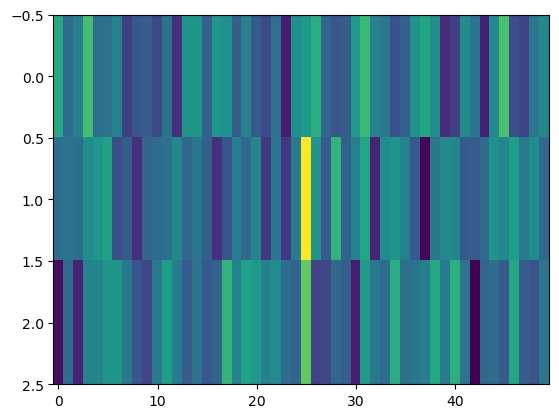

In [113]:
plt.imshow(vectors, interpolation='nearest')
plt.axis('auto')

We can plot the similarity among the vocabulary words in a 2-dimensional plane at relative positions that relate to their similarities.  We can use [t-SNE](https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_tsne.html) to project the word embeddings vectors to 2 dimensions and use [plotly](https://plotly.com/python/) to create an interactive plot.

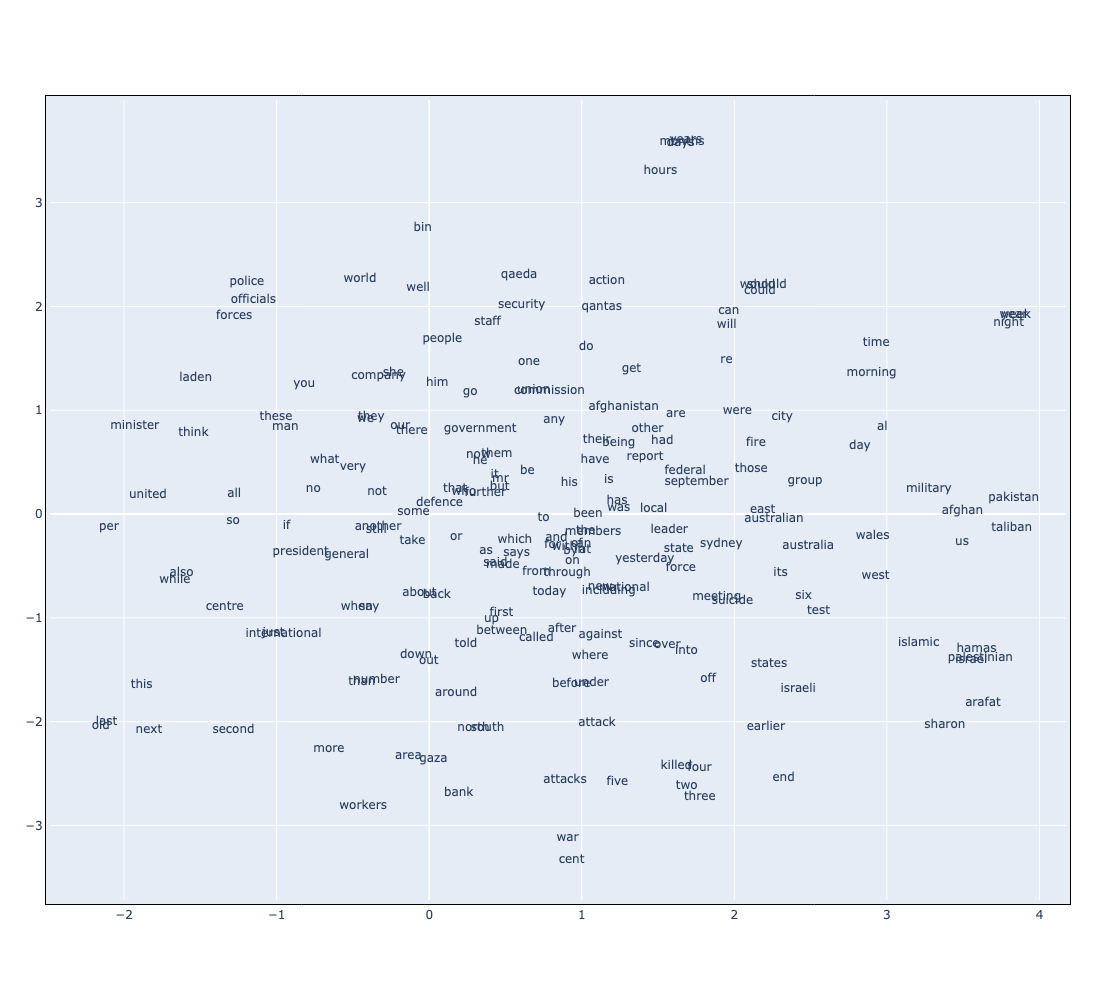

In [114]:
from sklearn.manifold import TSNE 

def reduce_dimensions(model, n_words=100):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors[:n_words])
    labels = np.asarray(model.wv.index_to_key[:n_words])  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model, n_words=200)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    layout = go.Layout(
        autosize=False,
        width=1000,
        height=1000,
        xaxis=go.layout.XAxis(linecolor="black", linewidth=1, mirror=True),
        yaxis=go.layout.YAxis(linecolor="black", linewidth=1, mirror=True),
        margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad=4),
    )

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot({'data': data, 'layout': layout}, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')

plot_with_plotly(x_vals, y_vals, labels)

In class we talked about using neural networks to construct an autoencoder network to project data into a small number of dimensions.  We used two units in a middle hidden layer to project data into two dimensions.  

[This site](https://n8python.github.io/mnistLatentSpace/) is a cool interactive demo of the two-dimensional space that results for the MNIST digits.